
==========

In [1]:
import numpy
import re
from matplotlib import pyplot
from matplotlib import colors
from IPython.display import Latex, Math, display
% matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.split(os.path.split(os.getcwd())[0])[0])

In [3]:
import utils.poly as poly
import utils.quadrature as quad
import utils.elems.one_d as elem

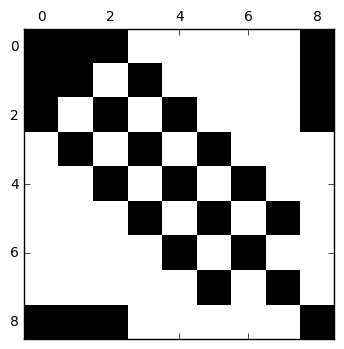

In [4]:
e1 = elem.CommonJacobiElem([-1, 1], 9)
M = numpy.where(e1.M != 0, 1, 0)
pyplot.matshow(M, cmap=colors.ListedColormap(['white', 'black']));

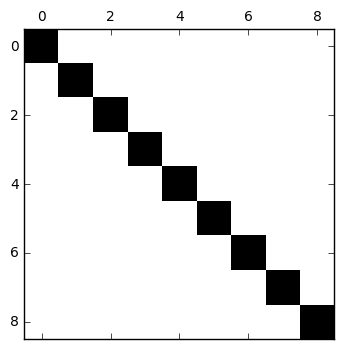

In [5]:
e2 = elem.GaussLobattoJacobiElem([-1, 1], 9)
M = numpy.where(e2.M != 0, 1, 0)
pyplot.matshow(M, cmap=colors.ListedColormap(['white', 'black']));

In [6]:
qd = quad.GaussLobattoJacobi(10)
f = poly.Polynomial(roots=[0, 0, 0, 0, 0, 0, 0])
fi1 = numpy.array([qd(e1.expn[i] * f) for i in range(9)])
ui1 = numpy.linalg.solve(e1.M, fi1)
fi2 = numpy.array([qd(e2.expn[i] * f) for i in range(9)])
ui2 = numpy.linalg.solve(e2.M, fi2)

In [7]:
def u(x, expn, Ui):
    """return the result of approximations"""
    
    ans = numpy.array([ui * expn[i](x) for i, ui in enumerate(Ui)])
    
    return ans.sum(axis=0)

In [8]:
x = numpy.linspace(-1, 1, 100)

err1 = numpy.abs(u(x, e1.expn, ui1) - f(x))
err2 = numpy.abs(u(x, e2.expn, ui2) - f(x))

l2norm1 = numpy.linalg.norm(err1, 2)
l2norm2 = numpy.linalg.norm(err2, 2)

print(l2norm1)
print(l2norm2)

6.90490415032e-14
9.0682828041e-14


In [9]:
ui1 = numpy.zeros(9, dtype=numpy.float64)
ui2 = numpy.zeros(9, dtype=numpy.float64)
ui1[0] = ui2[0] = f(-1.)
ui1[-1] = ui2[-1] = f(1.)

fi1 = numpy.array([qd(e1.expn[i] * f) for i in range(1, 8)]) - \
    numpy.array(e1.M[1:-1, 0] * ui1[0] + e1.M[1:-1, -1] * ui1[-1]).flatten()
ui1[1:-1] = numpy.linalg.solve(e1.M[1:-1, 1:-1], fi1)
fi2 = numpy.array([qd(e2.expn[i] * f) for i in range(1, 8)]) - \
    numpy.array(e2.M[1:-1, 0] * ui2[0] + e2.M[1:-1, -1] * ui2[-1]).flatten()
ui2[1:-1] = numpy.linalg.solve(e2.M[1:-1, 1:-1], fi2)

In [10]:
x = numpy.linspace(-1, 1, 100)

err1 = numpy.abs(u(x, e1.expn, ui1) - f(x))
err2 = numpy.abs(u(x, e2.expn, ui2) - f(x))

l2norm1 = numpy.linalg.norm(err1, 2)
l2norm2 = numpy.linalg.norm(err2, 2)

print(l2norm1)
print(l2norm2)

6.11824466078e-14
8.70148771231e-14


In [12]:
xmin = 2.
xMax = 5.

def X(xi):
    """mapping from xi to x"""
    
    return (xi + 1) * (xMax - xmin) / 2. + xmin

def Xi(x):
    """mapping from x to xi"""
    
    return 2. * (x - xmin) / (xMax - xmin) - 1

dx_dxi = (xMax - xmin) / 2.
dxi_dx = 2. / (xMax - xmin)
qd = quad.GaussLobattoJacobi(10)

ui1 = numpy.zeros(9, dtype=numpy.float64)
ui2 = numpy.zeros(9, dtype=numpy.float64)
ui1[0] = ui2[0] = f(xmin)
ui1[-1] = ui2[-1] = f(xMax)

fi1 = numpy.array([e1.expn[i](qd.nodes) * f(X(qd.nodes)) * qd.weights
                   for i in range(1, 8)]).sum(axis=1) - \
    numpy.array(e1.M[1:-1, 0] * ui1[0] + e1.M[1:-1, -1] * ui1[-1]).flatten()
ui1[1:-1] = numpy.linalg.solve(e1.M[1:-1, 1:-1], fi1)
fi2 = numpy.array([e2.expn[i](qd.nodes) * f(X(qd.nodes)) * qd.weights
                   for i in range(1, 8)]).sum(axis=1) - \
    numpy.array(e2.M[1:-1, 0] * ui2[0] + e2.M[1:-1, -1] * ui2[-1]).flatten()
ui2[1:-1] = numpy.linalg.solve(e2.M[1:-1, 1:-1], fi2)

In [13]:
xi = numpy.linspace(-1, 1, 100)

err1 = numpy.abs(u(xi, e1.expn, ui1) - f(X(xi)))
err2 = numpy.abs(u(xi, e2.expn, ui2) - f(X(xi)))

l2norm1 = numpy.linalg.norm(err1, 2)
l2norm2 = numpy.linalg.norm(err2, 2)

print(l2norm1)
print(l2norm2)

4.64014569871e-09
4.30752771777e-09
